# **Netflix EDA**

##### **Project Type**    - Exploratory Data Analytics
##### **Author**    - Pratik Choudhuri

# **Project Summary:**

This project involves **exploratory data analysis (EDA)** on a Netflix dataset using Python's data analysis and visualization libraries (`Pandas`, `Seaborn`, and `Matplotlib`). The dataset includes attributes like `title`, `cast`, `director`, `release year`, `rating`, `genre`, and `duration`. The analysis aims to uncover patterns and insights related to:

- The distribution of content types (Movies vs TV Shows)
- Country-wise contributions
- Genre popularity
- Actor involvement in different genres
- Content trends over time (genre and release year
- Correlation between numerical factors like duration, rating, and year
- Duration distribution across ratings and content types

# **GitHub Link -**

https://github.com/CodeBunny09/Netflix-EDA

# **Problem Statement**


This project helps to address the following analytical and operational problems:

1. **Content Strategy & Acquisition**
   - Which countries produce the most content? Useful for strategic partnerships.
   - Which genres are most popular over time? Helps with trend forecasting and acquisitions.

2. **User Segmentation & Targeting**
   - By mapping ratings to age groups, it becomes easier to tailor content for different demographics.
   - Understand what content types and durations align with audience age and preferences.

3. **Actor & Genre Relationship**
   - The radar charts show which actors are dominant in which genres, which helps in casting decisions or targeted promotions.

4. **Platform Utilization and Release Timing**
   - Month-wise analysis of when content is added can inform marketing schedules or content drops.
   - Comparison between year of release and addition shows how fresh the content is on Netflix.

5. **Duration and Format**
   - Understanding whether longer shows are more common in certain genres or ratings can help plan runtimes better.



# **Business Objective**

From a business and operational perspective, the following objectives are served:

1. **Optimize Content Portfolio**
   - By identifying top-performing countries, genres, and actors, Netflix can prioritize content investments and licensing.

2. **Audience Growth**
    - Genre trends over time and age-mapped rating data help in curating personalized content for different audience segments.

3. **Improve Retention and Engagement**
    - Knowing which types of content are watched when (e.g., monthly content drop trends) helps plan a more engaging content calendar.

4. **Data-Driven Recommendations**
    - Actor-genre analysis and correlation insights could feed into recommendation engine tuning (e.g., more accurate "Because you watched..." suggestions).

5. **Operational Efficiency**
    - Insight into content duration trends and their correlation with ratings or viewership potential can inform production and post-production planning.



## Loading and exploring the dataset

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

In [2]:
#loading the dataset
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


`df.head()` gives the first five columns, and gives a basic understanding of the dataset wether it is loaded properly or not

In [3]:
df.shape

(7787, 12)

`df.shape` gives an output of `(7787, 12)` which means that the dataset has **7787 rows** and **12 columns**

In [4]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


`df.describe()` shows you a **descriptive statistics** that summarize the **central tendency**, **dispersion** and **shape** of a dataset's distribution, excluding NaN values

By default, it works for **numeric columns** only

**The data shows that:**
- `count (7787)`: There are **7,787 entries** in the `release_year` column.
- `mean (2013.93`): The average release year is **around 2014**.
- `std (8.76)`, `25% (2013)`, `50% / median (2017)`, `75% (2018)`: Although the standard deviation is **8.76**, indicating **moderate variability**, the data is **skewed** toward more recent years—`25%` of titles were released by **2013**, `50%` by **2017**, and `75%` by **2018**, despite the **mean** release year being **around 2014**.
- `min (1925)`: The **earliest release year** in the dataset is **1925**.
- `max (2021)`: The **most recent release year** is **2021**.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Variables Description**
Below is a brief description of the key columns:
- **show_id**: Unique ID for each title.
- **type**: Content type (Movie or TV Show).
- **title**: Title of the movie or show.
- **director**, **cast**: Name(s) of director(s) or cast (actors) separated by commas.
- **country**: Country or countries where the title was produced (comma-separated).
- **date_added**: Date the title was added to Netflix’s catalog.
- **release_year**: The year the content was originally released.
- **rating**: Rating classification (e.g., TV-MA, R, PG-13).
- **duration**: For movies, length in minutes (e.g., 90 min); for TV shows, number of seasons (e.g., 3 Seasons).
- **listed_in**: Comma-separated genre/categories.
- **description**: Short synopsis of the content.

`df.info()` provides a concise summary of a DataFrame, displaying information about the DataFrame, including: **Index dtype**, **Column names**, **Data types** of each column, **Number of non-null values** in each column, and **memory usage**

### Findings from the above data:
- There are **7787 rows** and **12 columns**
- The columns `director`, `cast`, `country`, `date_added`, and `rating` has null columns.
- From `dtypes: int64(1), object(11)` we can infer that there is only one numeric (`int64`) column in the dataset i.e `release_year`, and all the other columns are strings (`object`)

**Lets dive deeper about the missing values in the following columns**

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

`df.isna().sum()` is a Pandas command used to find the **number of missing values in each column** of a DataFrame. 
**Here's how it works:**
- `df.isna()`: This part of the command **checks each cell** in the DataFrame df for missing values (`NaN`, `None`, etc.). It **returns** a new DataFrame of the **same shape** as df, but with boolean values: **True** if the value is missing, and **False** otherwise.
- `.sum()`: This part is applied to the boolean DataFrame resulting from `df.isna()`. The `sum()` function, when applied to boolean values, treats **True** as **1** and **False** as **0**. Therefore, it sums the True values in each column, effectively counting the number of missing values in each column.

**From the above data, we can see that:**
- `director` has **2389** missing values.
- `cast` has **718** missing values.
- `country` has **507** missing values.
- `date_added` has **10** missing values.
- `rating` has **7** missing values.

## Cleaning and preprocessing the data

**Data cleaning and preprocessing** is the crucial first step in any data analysis project, ensuring the data is **accurate**, **consistent**, and **ready for further analysis** or model building. This process involves **identifying and correcting errors**, **handling missing values**, and **transforming** the data into a suitable format. 

**First we have to update `date_added` from an `object` datatype to a `datetime64` datatype, then we will handle the missing values.**

### Handeling Missing Values:
**The following are the missing data, followed by the strategy to fill them:**
- `rating`: Fill the na-data with `"Unknown"`.
- `date_added`: Fill the na-data with **most recent release date**.
- `cast`: Fill the na-data with `"Unknown"`.
- `country`: Fill the na-data with `"Unknown"`.
- `director`: Fill the na-data with `"Unknown"`.

In [7]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [8]:
# convert data type (form object to datetime64)
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), format="%B %d, %Y", errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


Nice! The `date_added` column is now converted from `object` data type to `datetime64` data type.

**Lets deal with the missing values now**
- We will fill the null value in the columns `rating`, `cast`, `country`, and `director` as `"Unknown"` as obtaining that data is not possible from the dataset.
- We see that the data is **skewed toward more recent years**—25% of titles were released by 2013, 50% by 2017, and 75% by 2018, **despite the mean release year being around 2014** in the `release_year` column.
- So to fill the `NaT` values in the `date_added` column, we wont take the **average** or the **mean date**, rather we will **replace** it with the **most recent release year** in the dataset.

In [11]:
most_recent_date=df['date_added'].max() # find the most recent entry in the `date_added` column
print(f'Most recent release date: {most_recent_date}')

na_values = {
    'rating': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'director': 'Unknown',
    'date_added': most_recent_date
}
df.fillna(na_values, inplace=True)

Most recent release date: 2021-01-16 00:00:00


In [13]:
# checking an imputed entry
df[df['show_id'] == 's550']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
549,s550,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,2021-01-16,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


`date_added` which was `NaT` in this record is succesfully changed to the most recent release date (`2021-01-16`). 
Similarly for all the other rows, the `Nat` values are imputed to the most recent release date (`2021-01-16`). 

In [14]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The null values are successfully gone.

## Visualizations

Lets take a look at the type of shows on Netflix

### Type of show

In [15]:
df.type.value_counts() #check the actual counts

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

Text(0.5, 1.0, 'Count vs Type of Show')

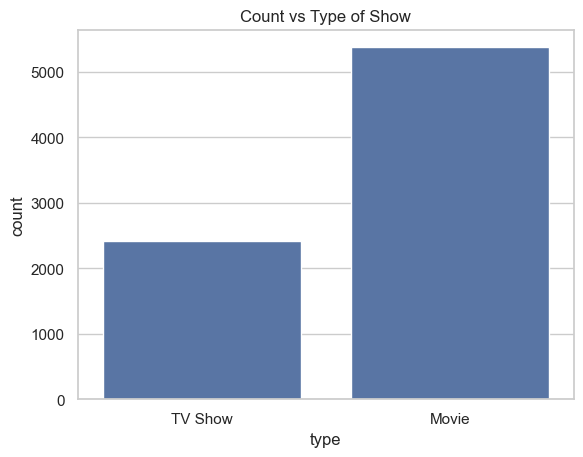

In [16]:
# now plot the data in a countplot
sns.countplot(x = 'type', data=df)
plt.title('Count vs Type of Show')

The `countplot` shows that there are more **Movies** in Netflix compared to **TV Shows**

Now lets see the **top 10 countries** that releases content on **Netflix**

1. Why the specific chart?
- A countplot was chosen because it effectively displays the frequency of categorical variables—in this case, the types of content ('Movie' vs 'TV Show') available on Netflix. It provides a simple visual comparison of the count of each category.

2. What is/are the insight(s) found from the chart?
- The chart reveals that Netflix hosts a greater number of Movies compared to TV Shows. This indicates a heavier emphasis on movie content in their catalog.

3. Will the gained insights help creating a positive business impact?
- Yes, the insight can positively impact business decisions by guiding Netflix to evaluate whether the current content mix aligns with user demand and viewing behavior. If analytics show that TV Shows have higher engagement or retention, Netflix might consider increasing TV Show content to optimize user satisfaction and retention. On the flip side, if the overrepresentation of Movies does not meet viewer preferences, this imbalance could lead to decreased user satisfaction and potential churn,


### Top 10 Countires

In [17]:
print(f'There are {len(df["country"].value_counts())} unique countries')
print(df['country'].value_counts().head(10))

There are 682 unique countries
country
United States     2555
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64


The top 10 countries is takes as there are 682 total countries, and visualizing them in a single plot will give a lot of noise and irregular data.

Text(0.5, 1.0, 'Top 10 Countries on Netflix')

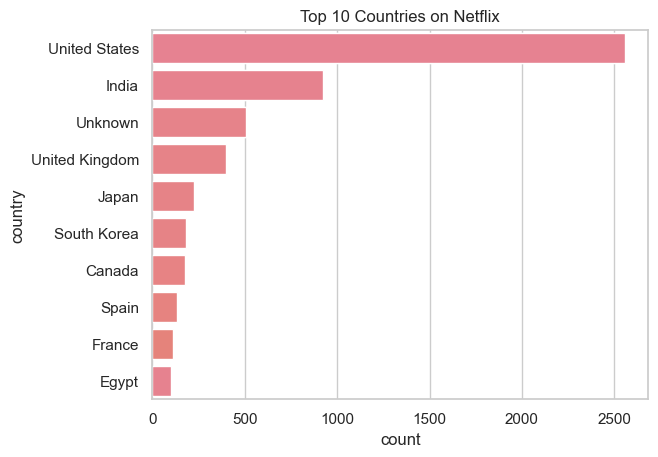

In [18]:
#plot the countplot
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10], data=df)

sns.countplot(
    y = 'country',
    hue = 'country',  
    order = df['country'].value_counts().index[0:10],
    data = df,
)

plt.title('Top 10 Countries on Netflix')

This is a combined countplot including both **movies** and **tv shows**.

Now lets look a the top 10 countries that has released **most of the content** grouped by its **type**.

1. Why the specific chart?
- A horizontal countplot with a hue was selected to visualize the top 10 countries producing the most content, segmented by type (Movies and TV Shows). This format makes it easy to compare both total volume and content type distribution across countries in a clear, side-by-side manner.

2. What is/are the insight(s) found from the chart?
- The chart shows which countries are the largest content contributors to Netflix and how their contributions break down between Movies and TV Shows. For example, the United States likely dominates both categories, while other countries may favor one type over the other, revealing strategic preferences or production strengths.

3. Will the gained insights help creating a positive business impact?
- Yes, these insights are valuable for content acquisition and localization strategies. If a country has a strong showing in TV Shows, Netflix might consider licensing or co-producing more TV content there to match audience interest. It also helps identify content gaps by country and type. On the flip side, if certain markets show a lopsided distribution (e.g., very few TV Shows from a major region), it could alienate users looking for that type of content, possibly leading to regional dissatisfaction and negative growth if not addressed.


### Top 10 Countries grouped by Type

In [19]:
# Create dfferent copies od dataset filtering out according to its type
movie_countries = df[df['type'] == 'Movie']
show_countries = df[df['type'] == 'TV Show']

Text(0.5, 1.0, 'Top 10 Countries producing TV Show on Netflix')

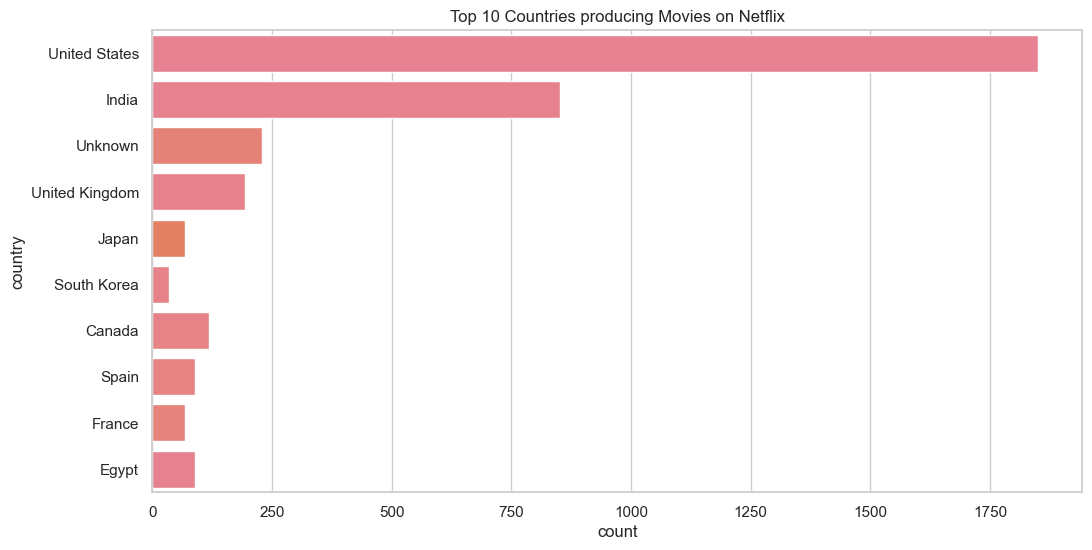

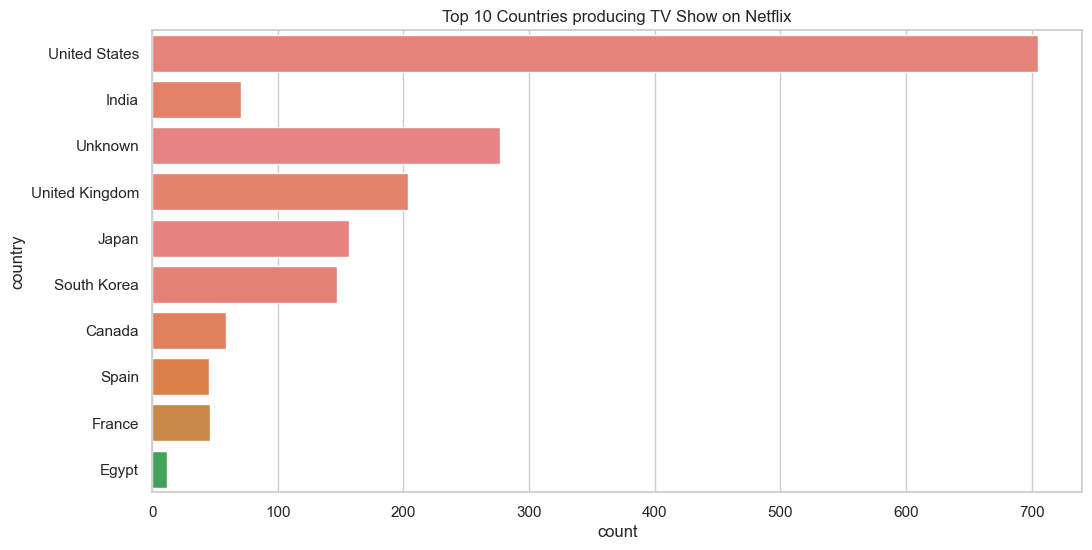

In [21]:
# Plot the data

# first the movie countries
plt.figure(figsize=(12, 6))
sns.countplot(
    y = 'country',
    hue = 'country',
    order = df['country'].value_counts().index[0:10],
    data = movie_countries,
)
plt.title('Top 10 Countries producing Movies on Netflix')


# and the shows
plt.figure(figsize=(12, 6))
sns.countplot(
    y = 'country',
    hue = 'country',
    order = df['country'].value_counts().index[0:10],
    data = show_countries,
)
plt.title('Top 10 Countries producing TV Show on Netflix')

**From the above data we can see that:**
1. **United States** produces the most amount of **movies** as well as **shows**.
2. The **second largest** producer of **movies** is **India** and **TV Shows** is **United Kingdom**.
3. This dataset also shows that there are a significant number of entries with **unknown countries**.

Now, lets see the **major ratings** given to the Netflix Shows.

1. Why the specific chart?
- Separate countplots for Movies and TV Shows were used to clearly visualize the distribution of top 10 content-producing countries by type. This separation allows for a more focused comparison within each category, avoiding visual clutter and making trends more apparent.

2. What is/are the insight(s) found from the chart?
- The key insights are:
    1. The United States is the dominant producer of both Movies and TV Shows on Netflix.
    2. India ranks second in Movie production, while the United Kingdom holds that position for TV Shows.
    3. A notable number of entries have missing or unknown country data, which could affect the accuracy of global content analysis.

3. Will the gained insights help creating a positive business impact?
- Yes, these insights help in strategic decision-making by showing where Netflix's content supply is concentrated and highlighting regional strengths in content type. This can guide content localization, investment in original productions, and partnerships with content creators in underrepresented regions. However, the presence of many entries with unknown countries introduces data quality issues that could hinder accurate analysis and forecasting. If not addressed, this could lead to misinformed decisions and negative growth in markets that are underserved or misrepresented in the data.


### Major Ratings

In [23]:
df.rating.value_counts() #lets check the count of all ratings

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
Unknown        7
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Show ratings on Netflix')

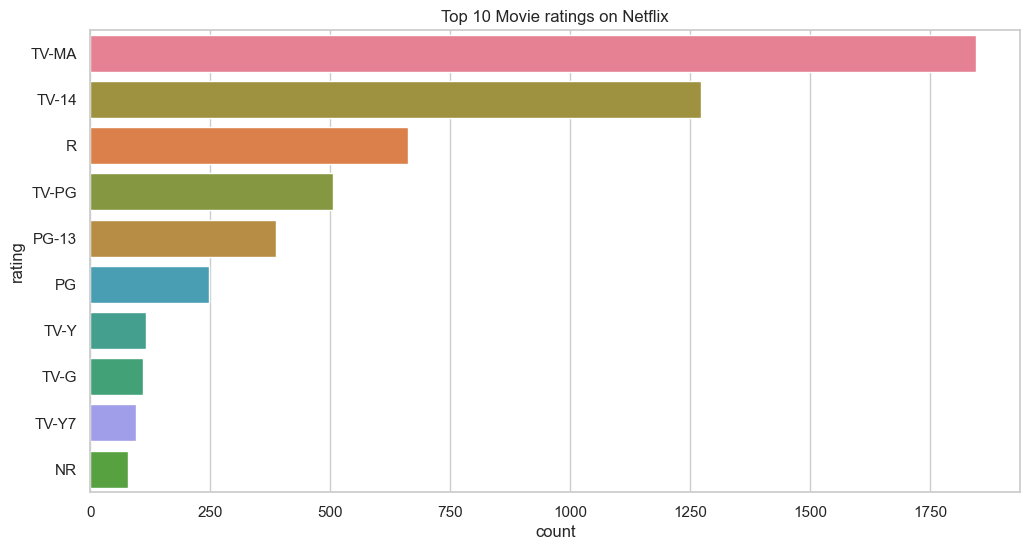

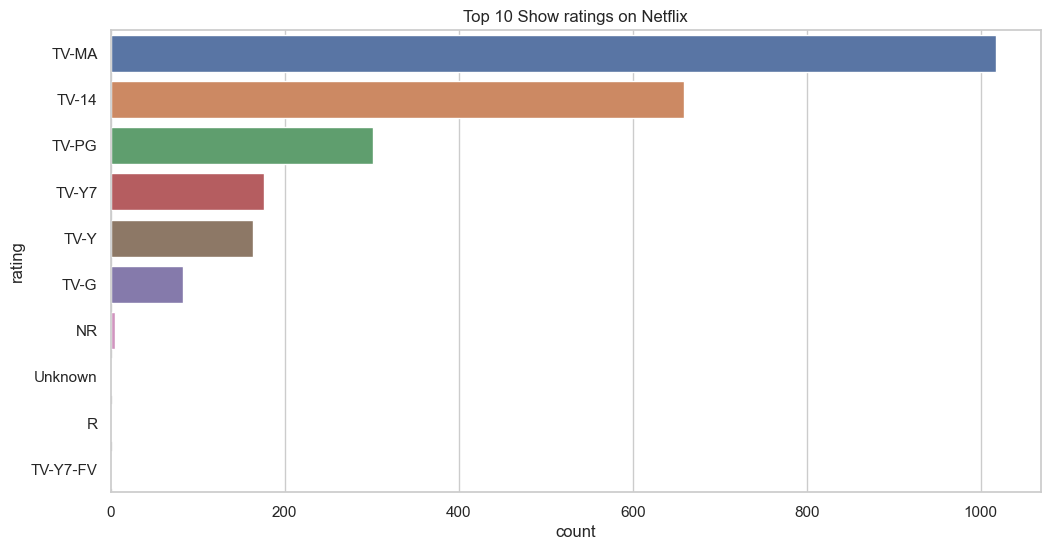

In [30]:
#plot the data
plt.figure(figsize=(12, 6))
sns.countplot(
    y = 'rating',
    hue = 'rating',
    order = movie_countries['rating'].value_counts().index[0:10],
    data = movie_countries,
)
plt.title('Top 10 Movie ratings on Netflix')


#plot the data
plt.figure(figsize=(12, 6))
sns.countplot(
    y = 'rating',
    hue = 'rating',
    order = show_countries['rating'].value_counts().index[0:10],
    data = show_countries,
)
plt.title('Top 10 Show ratings on Netflix')



**According to the visualization:**
- The data shows that most of the content in Netflix is for a **mature** `TV-MA`, `TV-R` set of audiences wether it is a **movie** or a **show**.
- Also the data shows that there are a lot of content for **kids** `TV-14`, `PG-13` too.

Now lets check the **top 20 release years**

1. Why did you pick the specific chart?
- Separate countplots for Movie and TV Show ratings were selected to understand the distribution of content by audience maturity levels. This format makes it easy to compare which ratings dominate in each content type, highlighting the platform’s target demographics.

2. What is/are the insight(s) found from the chart?
- The charts reveal that the majority of Netflix content is rated for mature audiences, such as TV-MA and R-rated categories, for both Movies and TV Shows. However, a considerable portion is also aimed at younger audiences, including ratings like TV-14 and PG-13, indicating a content mix that spans multiple age groups.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, these insights help Netflix align its content strategy with its audience segments. Understanding that mature-rated content dominates can guide decisions on marketing, age-restricted features, and content development. At the same time, the presence of substantial kid-friendly content suggests opportunities for family-oriented marketing and platform personalization. However, if the balance skews too heavily toward mature content, it could alienate family or younger viewers, potentially limiting audience growth


### Top 20 release years

In [31]:
df.release_year.value_counts()[:20] # checking the top 20 release years

release_year
2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
2011     166
2009     137
2008     125
2007      85
2006      85
2005      73
2004      59
2003      49
2002      45
2001      36
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 TV Show release year(s) on Netflix')

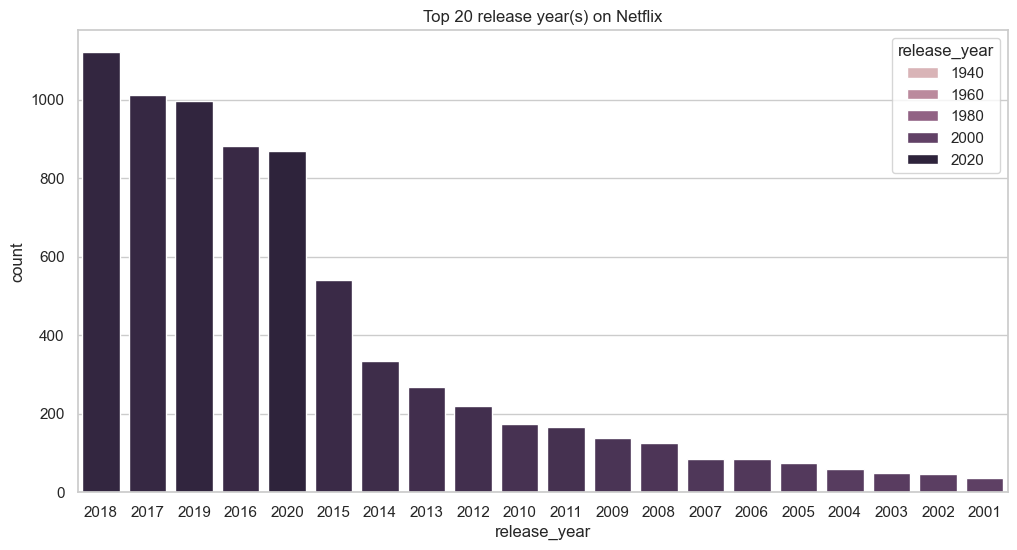

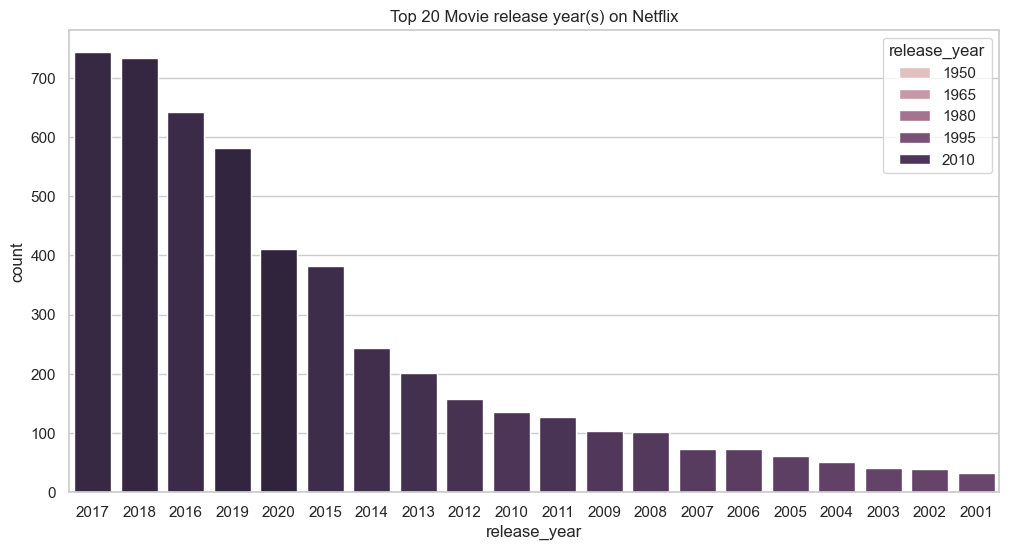

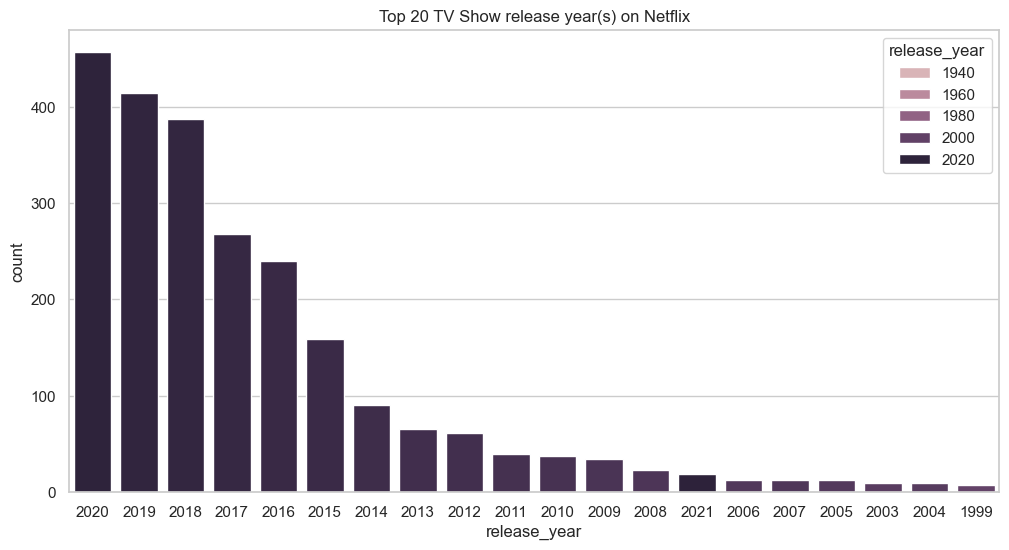

In [32]:
# plot the data

## The whole count
plt.figure(figsize=(12, 6))
sns.countplot(
    x = 'release_year',
    hue = 'release_year',
    order = df['release_year'].value_counts().index[0:20],
    data = df,
)
plt.title('Top 20 release year(s) on Netflix')


## Counts divided as per movies and shows
plt.figure(figsize=(12, 6))
sns.countplot(
    x = 'release_year',
    hue = 'release_year',
    order = movie_countries['release_year'].value_counts().index[0:20],
    data = movie_countries,
)
plt.title('Top 20 Movie release year(s) on Netflix')


plt.figure(figsize=(12, 6))
sns.countplot(
    x = 'release_year',
    hue = 'release_year',
    order = show_countries['release_year'].value_counts().index[0:20],
    data = show_countries,
)
plt.title('Top 20 TV Show release year(s) on Netflix')


**The above visualization gives us a rough idea about:** 
- Most of the content was rreleased during **2017**, **2018**, **2019**, and other years had a significantly low number of releases.
- This also shows that Netflix started releasing **more shows and movies** during the **COVID-19** time when most of the people were at home.
- Most of the **TV Shows** were released on **2020**, followed by **2019** and then **2018**.
- Most of the **Movies** were released on **2018**, then **2017** and then **2019**.

1. Why did you pick the specific chart?
- Countplots segmented by overall content, Movies, and TV Shows across release years were used to clearly identify trends in content output over time. This format allows for both a general and a type-specific view of how content release volume has evolved, particularly highlighting peak production years.

2. What is/are the insight(s) found from the chart?
- The visualizations show that the majority of Netflix content was released between 2017 and 2020. There was a noticeable spike in TV Show releases in 2020, likely influenced by increased streaming demand during the COVID-19 pandemic. For Movies, the peak years were 2018, 2017, and 2019, indicating a pre-pandemic production focus on films.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, these insights can inform Netflix's production and content release strategy by aligning future release volumes with historical audience engagement data. Recognizing the impact of external factors like the pandemic on content consumption can help in planning for future global disruptions. However, if the production volumes in recent years have dropped significantly post-pandemic without maintaining user interest, it may lead to stagnation or decline in subscriber retention, contributing to potential negative growth. Additionally, over-reliance on a short burst of content during peak years without sustained output might affect long-term user engagement.

Lets analyse the **Genres** now

### Genre Distribution

Text(0.5, 1.0, 'Top 20 Show Genres on Netflix')

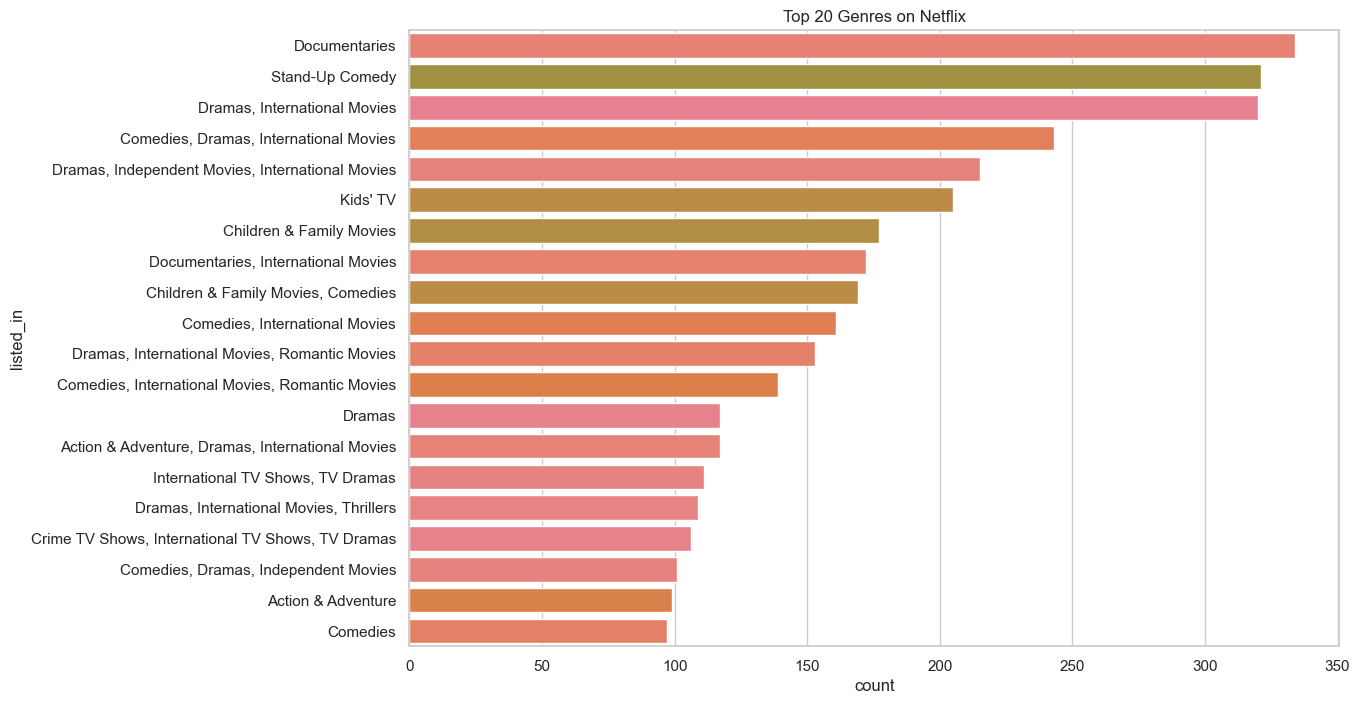

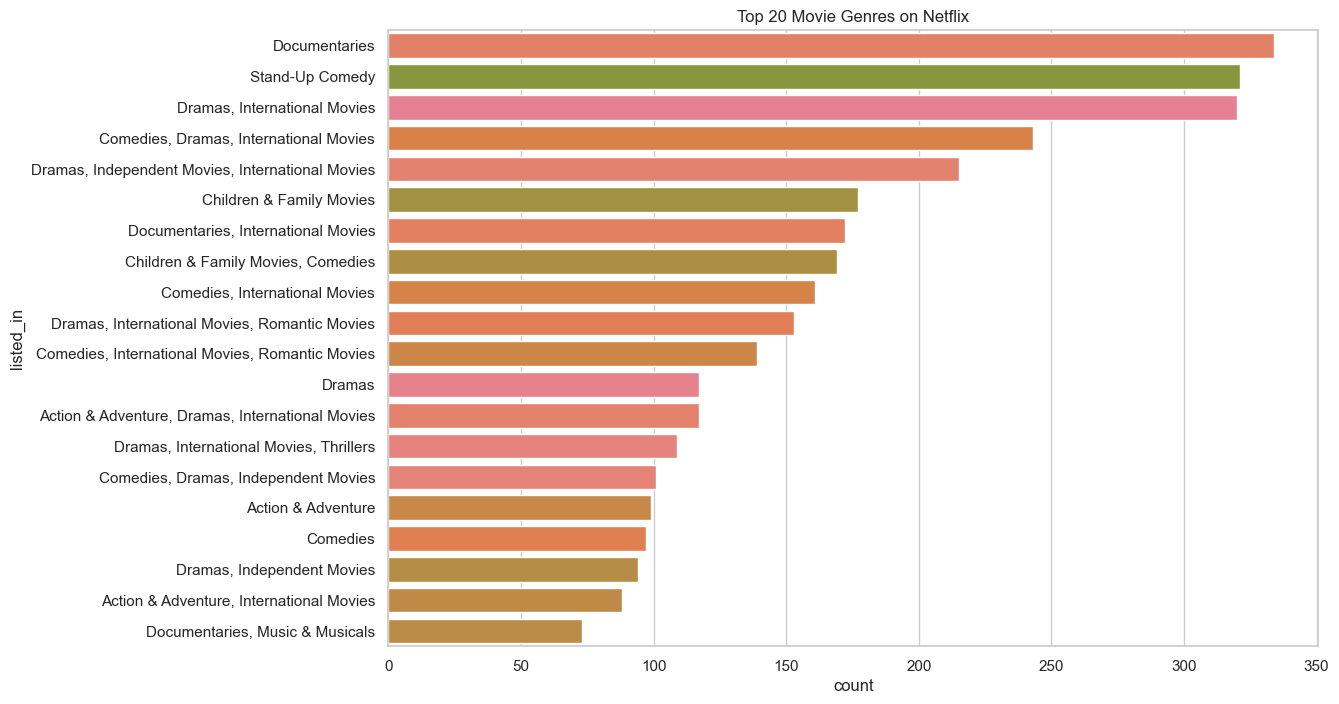

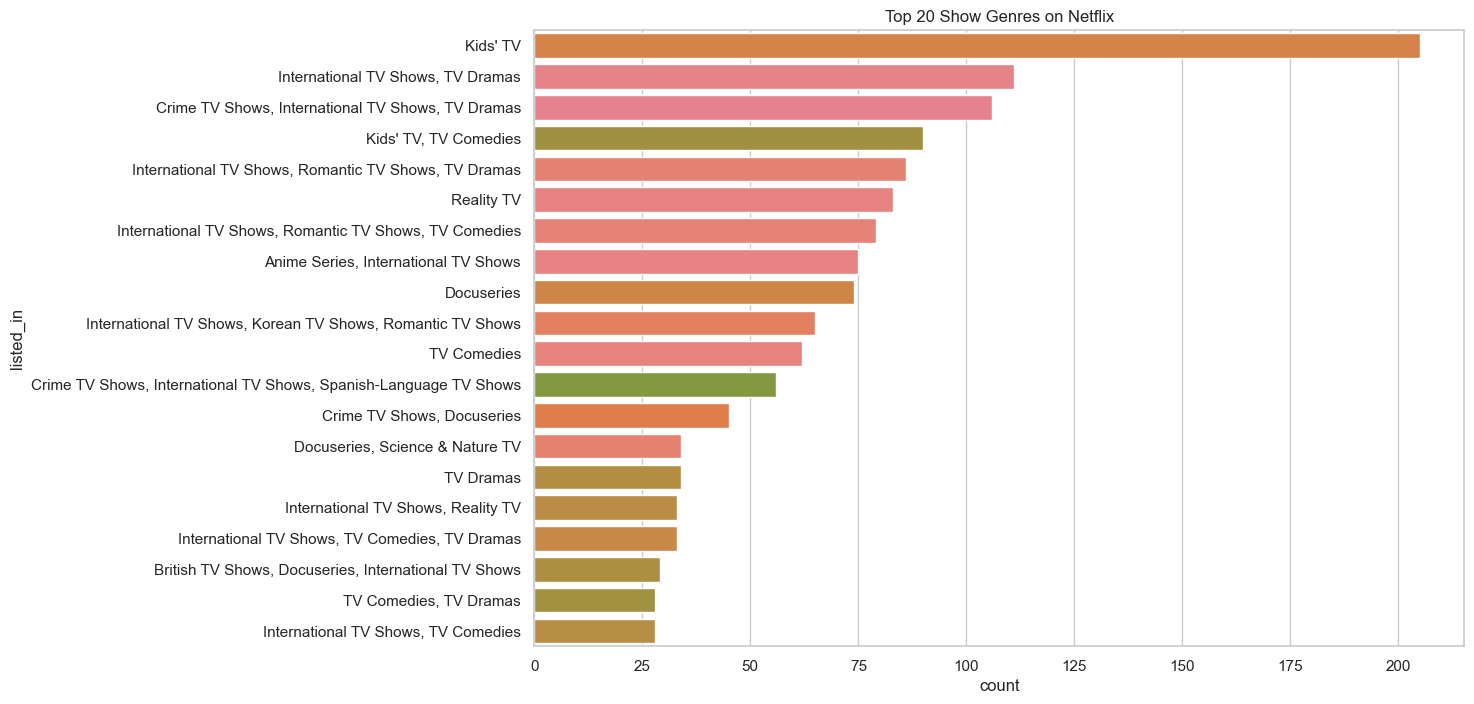

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(
    y = 'listed_in',
    hue = 'listed_in',
    order = df['listed_in'].value_counts().index[0:20],
    data = df,
)
plt.title('Top 20 Genres on Netflix')


plt.figure(figsize=(12, 8))
sns.countplot(
    y = 'listed_in',
    hue = 'listed_in',
    order = movie_countries['listed_in'].value_counts().index[0:20],
    data = movie_countries,
)
plt.title('Top 20 Movie Genres on Netflix')


plt.figure(figsize=(12, 8))
sns.countplot(
    y = 'listed_in',
    hue = 'listed_in',
    order = show_countries['listed_in'].value_counts().index[0:20],
    data = show_countries,
)
plt.title('Top 20 Show Genres on Netflix')

From the visualization above, we get the following information:
- Most of the content in netflix are **documentaries**, **stand-up comedy**, **dramas** and **international movies**.
- Most of the **movies** in netflix are **documentaries**, **stand-up comedy**, **dramas** and **international movies** too.
- Most of the **shows** in netflix are **Kids TV**, although the in the **ratings**, we can see that most of the content is for **mature** audiences.
- Most of the **shows** in netflix are **Kids TV**, **dramas** and **international TV shows** too.


1. Why did you pick the specific chart?
- Separate countplots for overall genres, movie genres, and show genres were used to analyze the top 20 content categories on Netflix. This breakdown allows for a clearer understanding of the genre preferences by content type, helping to identify trends and gaps in Netflix’s catalog.

2. What is/are the insight(s) found from the chart?
- The insights show that Netflix has a strong focus on genres like documentaries, stand-up comedy, dramas, and international movies. For TV Shows specifically, Kids TV leads in volume, followed by dramas and international shows. This suggests that while ratings data indicates a large share of mature content, the genre classification for shows still reflects a substantial offering for younger audiences.

3. Will the gained insights help creating a positive business impact?
- Yes, understanding genre distribution helps Netflix tailor its content strategy to match viewer interests and fill underserved niches. The strong presence of documentaries and stand-up comedy suggests a growing demand for educational and entertainment-focused content, which Netflix can capitalize on.

Let's look deeper into **what genres** are the **top actors** most interested in and analyze their involvement in **minutes**.

### Radar Plot for Top 20 Actors showing their Genre-Involvement Based on Time

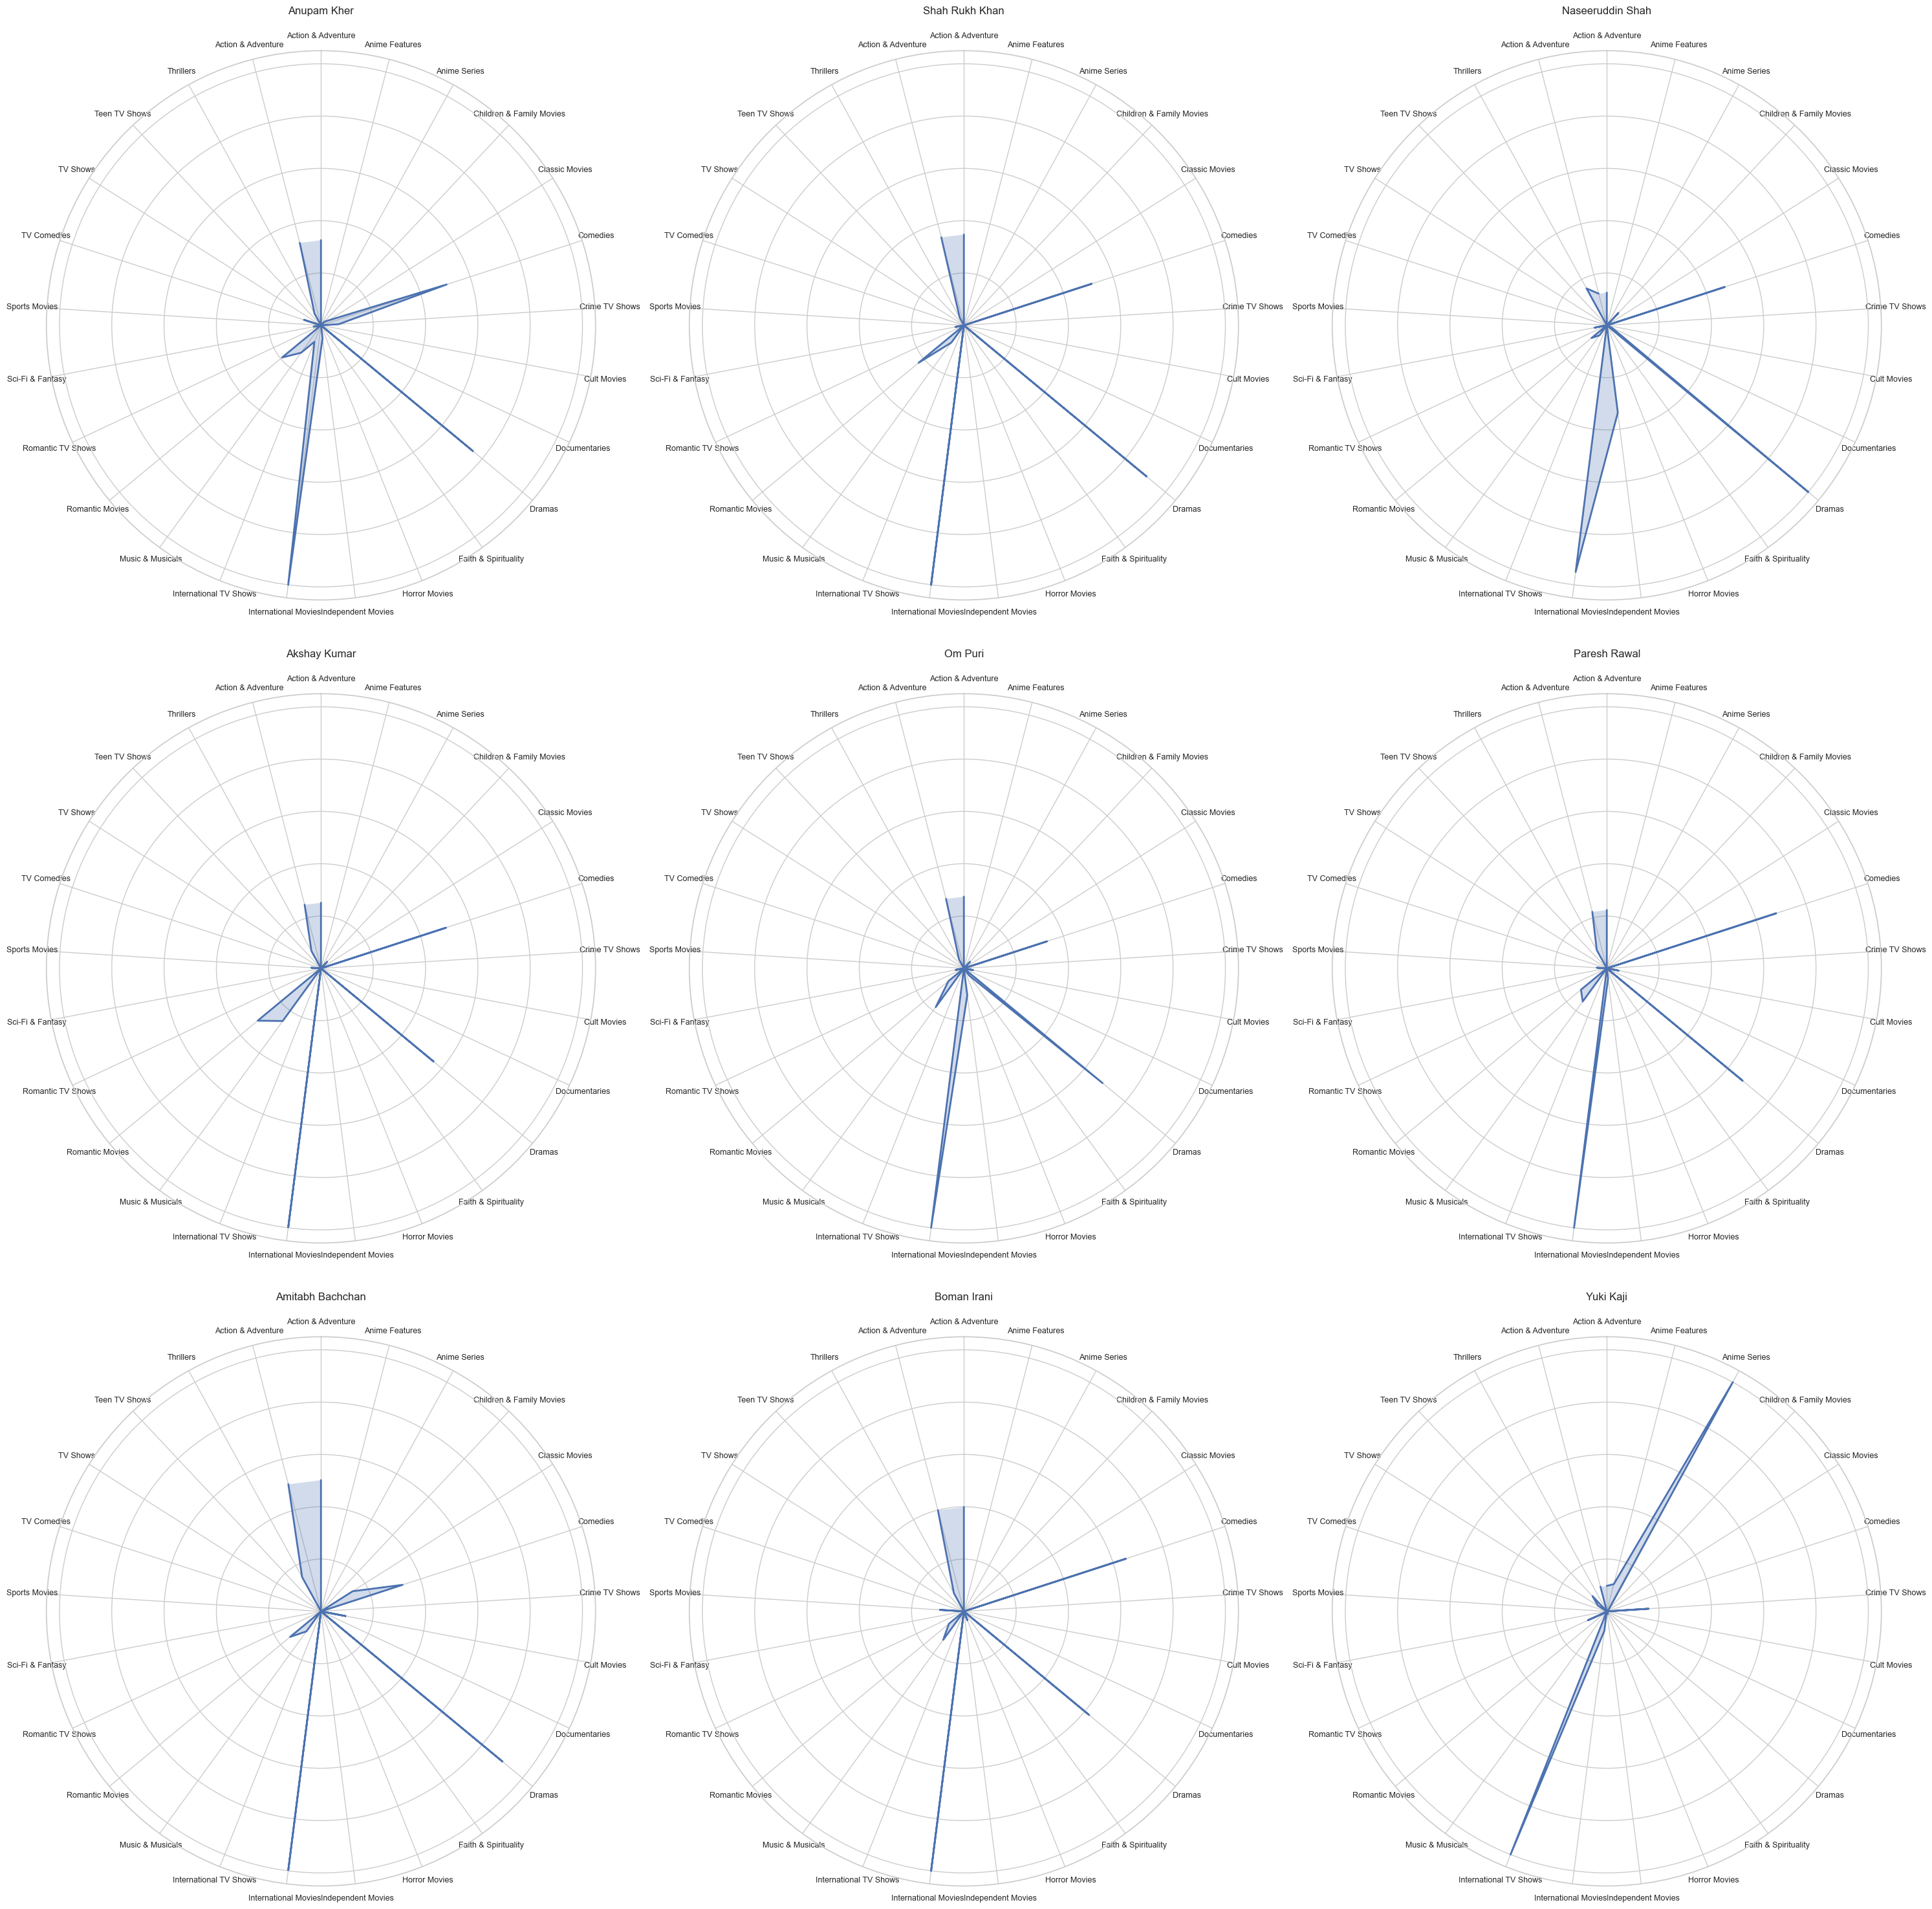

In [35]:
# Clean data (Remove "Unknown" actors and genres)
df_valid = df[(df['cast'] != 'Unknown') & (df['listed_in'] != 'Unknown')].copy()

# Step 2: Explode the columns
df_valid['cast'] = df_valid['cast'].str.split(', ')
df_valid['listed_in'] = df_valid['listed_in'].str.split(', ')
df_exploded = df_valid.explode('cast').explode('listed_in')

# Parse and add duration in minutes
def parse_duration(x):
    if pd.isna(x):
        return None
    if 'min' in x:
        return int(x.replace(' min', ''))
    elif 'Season' in x:
        return int(x.split(' ')[0]) * 12 * 30  # Approx. 1 season = 12ep, 30 mins each
    return None

df_exploded['duration_min'] = df_exploded['duration'].apply(parse_duration)

# Get top 9 actors
top_9_actors = df_exploded['cast'].value_counts().head(9).index.tolist()

# Step 5: Create pivot table (actor x genre with sum of durations)
pivot = df_exploded[df_exploded['cast'].isin(top_9_actors)] \
    .groupby(['cast', 'listed_in'])['duration_min'] \
    .sum() \
    .unstack(fill_value=0)

# Radar Chart Function
def plot_radar(actor, data, ax):
    labels = list(data.columns)
    values = data.loc[actor].values.tolist()

    # Normalize to a max of 100 for better comparison (optional)
    max_val = max(values) if max(values) != 0 else 1
    values = [(v / max_val) * 100 for v in values]

    # Close the radar loop
    values += values[:1]
    labels += labels[:1]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(actor, size=12, pad=20)
    ax.set_xticks(angles)
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_yticklabels([])

# Plot radar charts in 3x3 layout
fig, axs = plt.subplots(3, 3, figsize=(30, 30), subplot_kw={'polar': True})
axs = axs.flatten()

for i, actor in enumerate(top_9_actors):
    plot_radar(actor, pivot, axs[i])

plt.tight_layout()
plt.show()

**From the above data we know that:**
- All of the top actors except **Yuki Kaji** has worked in **Thrillers** genre along with **Action and Adventure**
- **Anupam Kher's** adaptation to a wide range of genres including **Thrillers**, **Actions**, **Romantic Shows**, **Comedies**, **Dramas**, **Fantasies**, **Shows**, **Classics** makes him one of the top 9 actors.
- **Comedy** is another common **genre** within the top actors.
- According to the **time involvement**, these actors invested themselves in the **International Movies** and **Independent Movies** genre

1. Why did you pick the specific chart?
- Radar plots were used to represent each top actor’s involvement across different genres, measured by total screen time. This format allows for an intuitive and visually engaging comparison of genre diversity and specialization across multiple actors in a compact grid layout.

2. What is/are the insight(s) found from the chart?
- The radar plots reveal that:
    - Most of the top 9 actors, except Yuki Kaji, have contributed significantly to Thriller, Action, and Adventure genres.
    - Anupam Kher stands out due to his involvement across a wide spectrum of genres, indicating strong versatility.
    - Comedy is a commonly shared genre among top actors.
    - Several actors have devoted considerable time to International and Independent Movies, suggesting a global and niche market appeal.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, these insights can guide Netflix in casting decisions and personalized content recommendations. Identifying actors who perform well across multiple genres helps in producing diverse and high-appeal content. Also, understanding time investment per genre helps prioritize partnerships with actors that align with high-demand content categories. There is no immediate indication of insights that lead to negative growth, but overuse of certain actors in similar genres could risk viewer fatigue or lack of novelty, which should be managed with varied casting and fresh content.


### Genre Popularity Over Time

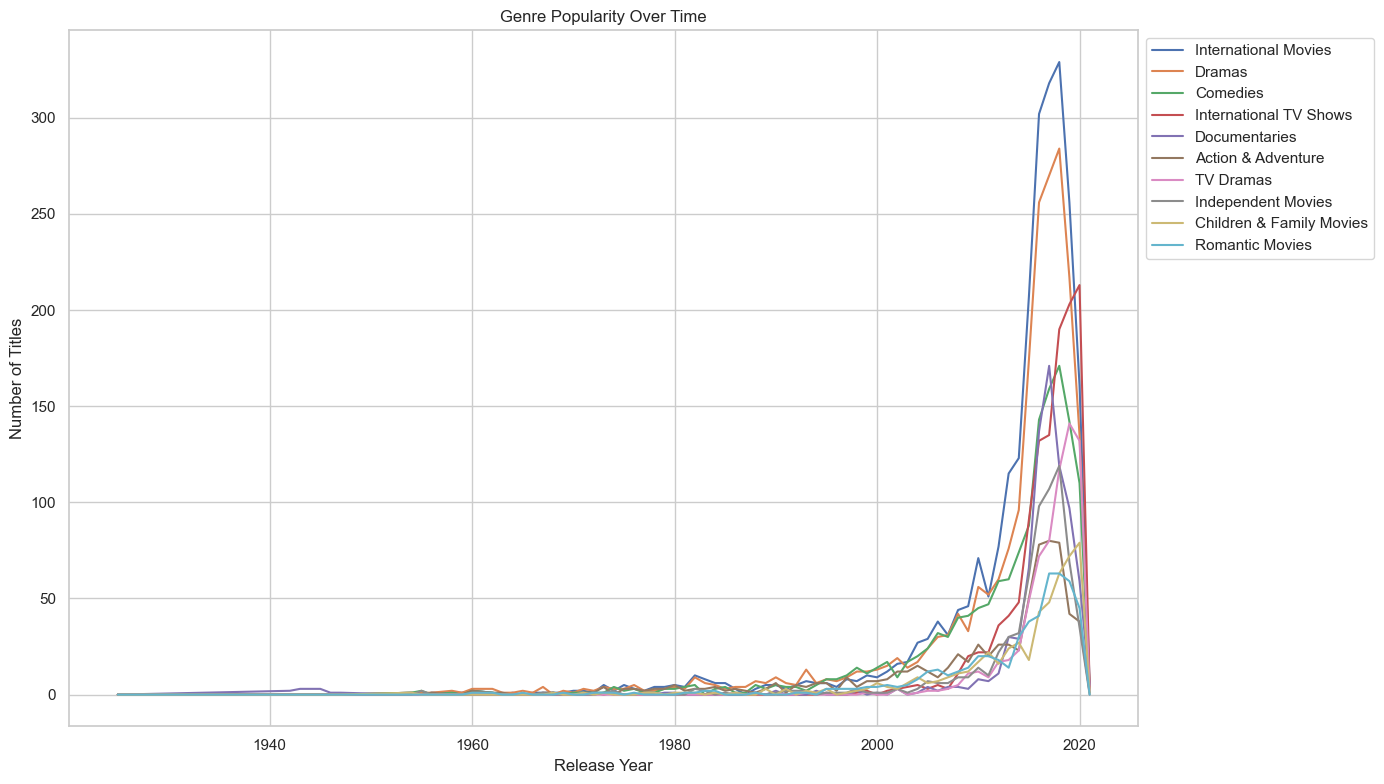

In [36]:
# Filter out unknowns
df_valid = df[(df['listed_in'] != 'Unknown') & (df['release_year'].notna())].copy()

# Explode the genres
df_valid['listed_in'] = df_valid['listed_in'].str.split(', ')
df_exploded = df_valid.explode('listed_in')

# Group by genre and year
genre_year_counts = df_exploded.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Pivot the data to get genres as columns
genre_trend = genre_year_counts.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

# Only keep top N genres by total count
top_genres = df_exploded['listed_in'].value_counts().head(10).index
genre_trend = genre_trend[top_genres]

# Plot
plt.figure(figsize=(14, 8))
for genre in genre_trend.columns:
    plt.plot(genre_trend.index, genre_trend[genre], label=genre)

plt.title("Genre Popularity Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

The above graph shows that movies and shows were released consistently among most of the genres

Around 2017, Netflix experienced a period where its library size decreased, but this was part of a broader strategy to focus on original content and reduce reliance on licensed titles from other studios, reports Vox states. While this shift meant fewer titles were available from external sources, it also allowed Netflix to invest heavily in its own productions, potentially leading to higher-quality content and a more distinct brand identity

1. Why did you pick the specific chart?
- A line chart was chosen to track the popularity of the top 10 genres over time, as it effectively visualizes trends and fluctuations across years. This format allows easy identification of rising or declining genre trends based on the number of titles released annually.

2. What is/are the insight(s) found from the chart?
- The visualization shows that content has been released consistently across the top genres over the years. Although no single genre demonstrates extreme dominance or decline, the chart highlights steady output, suggesting a balanced genre strategy by Netflix.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, the consistent genre release trends indicate Netflix’s strategic effort to maintain a diverse content library, which can help attract and retain a wide audience base. By analyzing this data further, Netflix can identify emerging genre preferences and allocate resources accordingly. However, the absence of sharp rises or new genre surges might suggest missed opportunities for innovation or niche market expansion, which could lead to stagnation if not addressed proactively.

### Correlation Heatmap

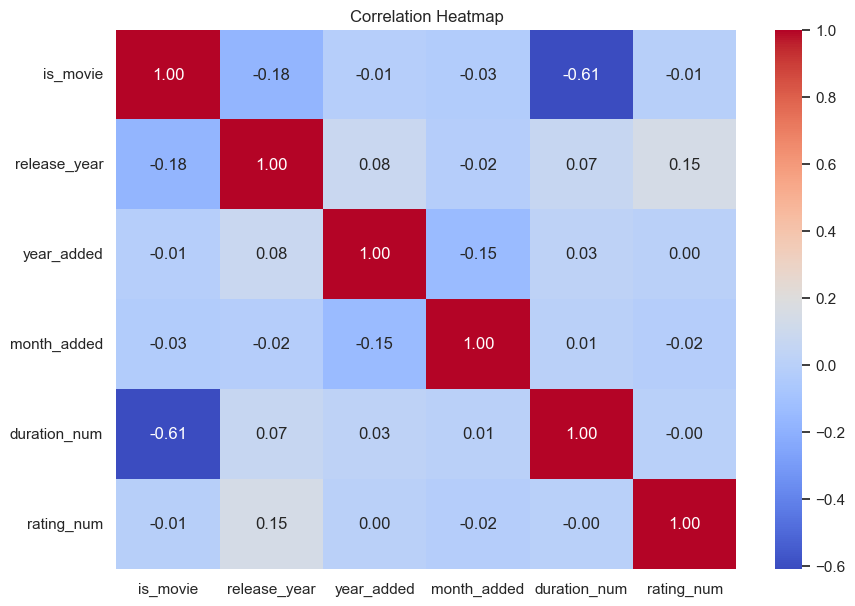

In [38]:
# 1. Type (Movie = 1, TV Show = 0)
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# 2. Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# 3. Convert duration into numerical value
def parse_duration(x):
    if pd.isna(x):
        return None
    if 'min' in x:
        return int(x.replace(' min', ''))
    elif 'Season' in x:
        return int(x.split(' ')[0]) * 12 * 30  # Approx. 1 season = 12ep, 30 mins each
    elif 'Unknown' in x:
        return None
    return None

df['duration_num'] = df['duration'].apply(parse_duration)

# 4. Map rating to approximate audience age
rating_map = {
    'G': 0, 'TV-G': 0,
    'PG': 10, 'TV-PG': 10,
    'PG-13': 13, 'TV-14': 14,
    'R': 17, 'TV-MA': 18,
    'NC-17': 18,
}
df['rating_num'] = df['rating'].map(rating_map)

# 5. Keep only numeric columns
correlation_df = df[['is_movie', 'release_year', 'year_added', 'month_added', 'duration_num', 'rating_num']]

# Drop rows with missing values
correlation_df = correlation_df.dropna()

# 6. Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**The above correlation heatmap gives the correlation between the variables indicating how one varuiable is related to the others.**

**For example:**
| Variables                        | Correlation | Insight                                    |
| -------------------------------- | ----------- | ------------------------------------------ |
| `is_movie` vs `duration_num`     | -0.61       | TV Shows are longer on average than movies |
| `release_year` vs `rating_num`   | +0.15       | Newer content is more mature               |
| `release_year` vs `duration_num` | +0.07       | Newer shows/movies are getting longer      |
| `year_added` vs `release_year`   | +0.08       | Netflix is adding more recent content      |


1. Why this chart?
- A correlation heatmap was selected to identify linear relationships between numerical features in the dataset. This chart format clearly highlights positive and negative correlations between key variables like content type, duration, release year, and maturity rating, aiding in quick pattern detection.

2. What is/are the insight(s) found from the chart?
    - TV Shows tend to have longer durations than movies.
    - Newer content tends to be more mature (i.e., higher ratings like TV-MA).
    - There's a slight trend of decreasing content duration over time.
    - Netflix increasingly adds newer content, suggesting a shift toward relevance and recency.
    
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, these insights support smarter content strategy and platform curation. For example, knowing that modern audiences prefer shorter, more mature content could guide Netflix in commissioning series and films that match this demand. Additionally, ensuring a steady influx of new content can keep the platform fresh and engaging. However, a potential downside is that overly short content may impact viewer satisfaction if stories feel rushed or underdeveloped—this should be monitored through user engagement metrics.


### Pair plots for key insights

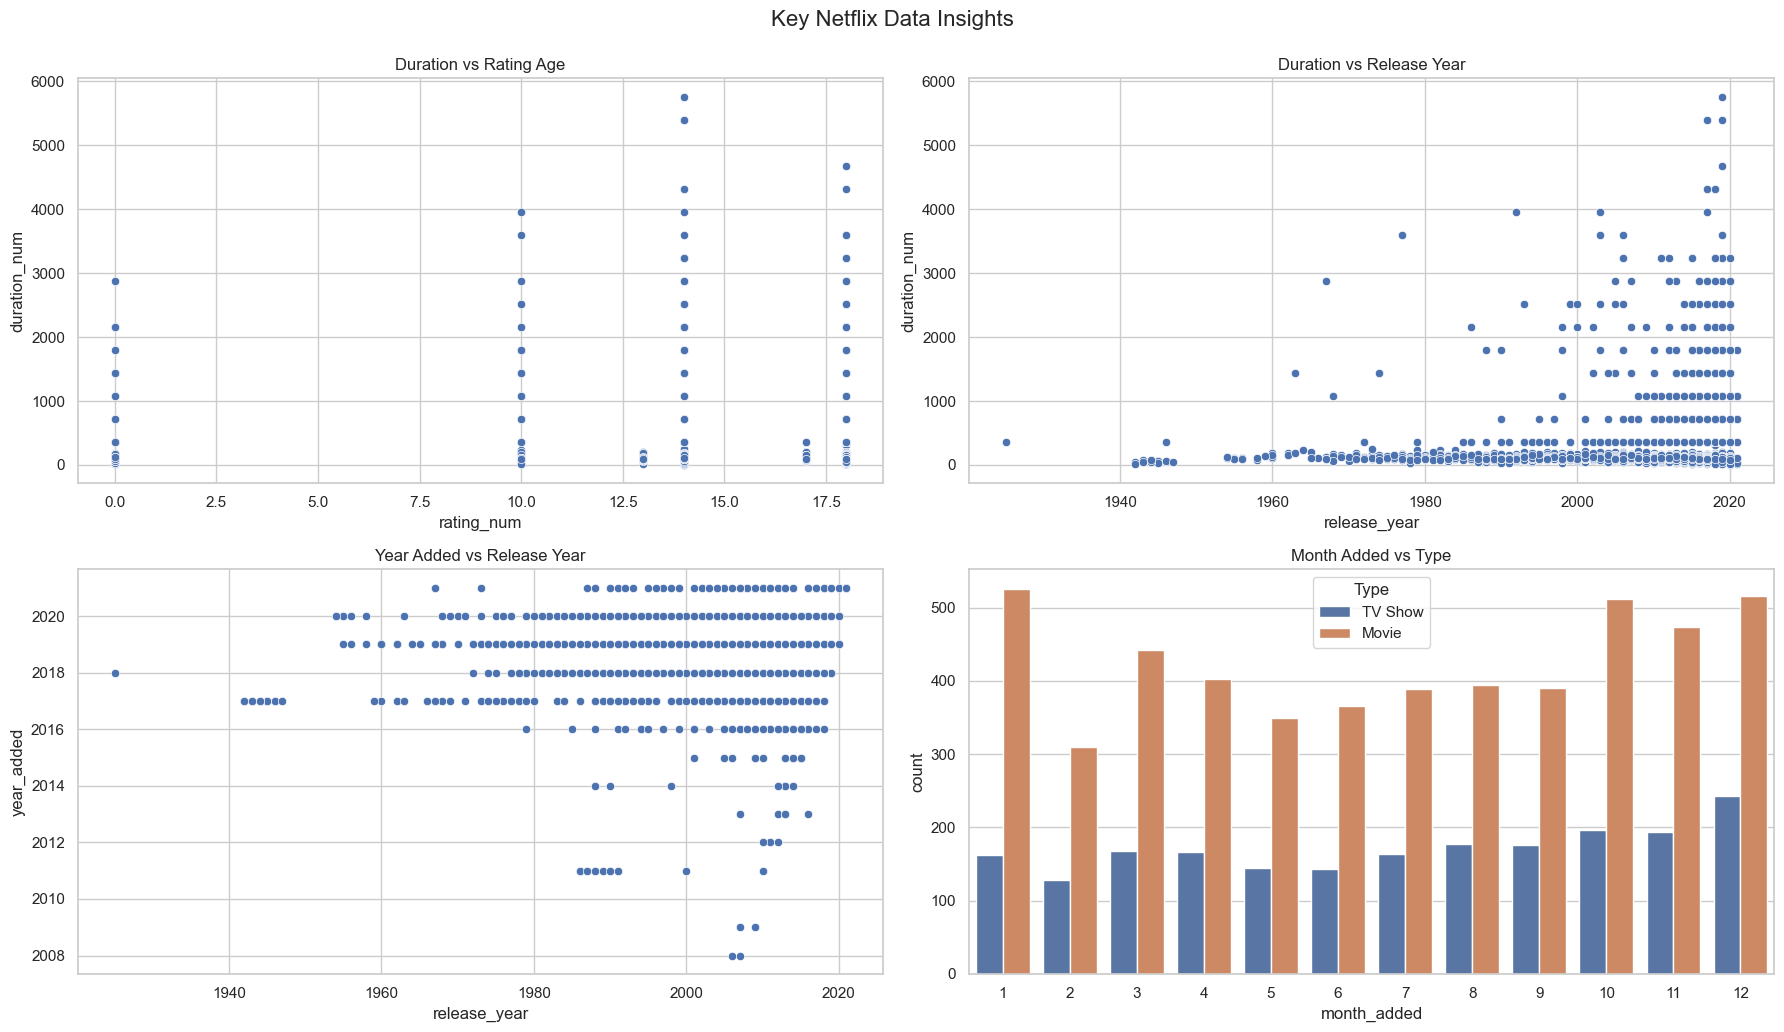

In [40]:
# Create a 2x2 canvas
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

# 1. duration_num vs rating_num
sns.scatterplot(data=correlation_df, x='rating_num', y='duration_num', ax=axs[0])
axs[0].set_title('Duration vs Rating Age')

# 2. release_year vs duration_num
sns.scatterplot(data=correlation_df, x='release_year', y='duration_num', ax=axs[1])
axs[1].set_title('Duration vs Release Year')

# 3. year_added vs release_year
sns.scatterplot(data=correlation_df, x='release_year', y='year_added', ax=axs[2])
axs[2].set_title('Year Added vs Release Year')

# 4. month_added vs is_movie
sns.countplot(data=correlation_df, x='month_added', hue='is_movie', ax=axs[3])
axs[3].set_title('Month Added vs Type')
axs[3].legend(title='Type', labels=['TV Show', 'Movie'])

plt.tight_layout()
plt.suptitle('Key Netflix Data Insights', fontsize=16, y=1.03)
plt.show()

From the above visualizations, we get a more clear instght about the data. These are:
- Contents are added mainly in the winters. **Nov**, **Dec**, **Jan**
- Most of the content Netflix releases are **recently released**.
- The duration has no corelation with date released. Which means, the duration of the movies or shows maybe short or long.
- From the `duration` vs `rating` graph, we can see that **PG Rating** is not related with **duration**. There are all duration of content for all age groups.

1. Why did you pick the specific chart?
- Pair plots and scatterplots were chosen to visually explore relationships between multiple variable pairs. This layout helps reveal patterns, outliers, and distribution trends across different metrics like duration, rating, release year, and addition time.

2. What is/are the insight(s) found from the chart?
    - Netflix adds most content during winter months (Nov–Jan), possibly aligning with higher viewership periods.
    - Recently released content is prioritized for addition, as indicated by a strong match between release year and year added.
    - There is no significant relationship between content duration and release year, indicating creative freedom regardless of release time.
    - Content duration spans broadly across all rating groups, suggesting Netflix caters to diverse age groups with varied content lengths.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, these insights can drive effective scheduling and content planning. For instance, aligning major releases with winter months can leverage seasonal viewership spikes. Understanding that duration is not constrained by rating or release period empowers creative teams. No evident negative insights were found; however, over-reliance on seasonal release timing could lead to less consistent engagement across the year


### Clustering TV Shows and Movies based on Time and Release Year

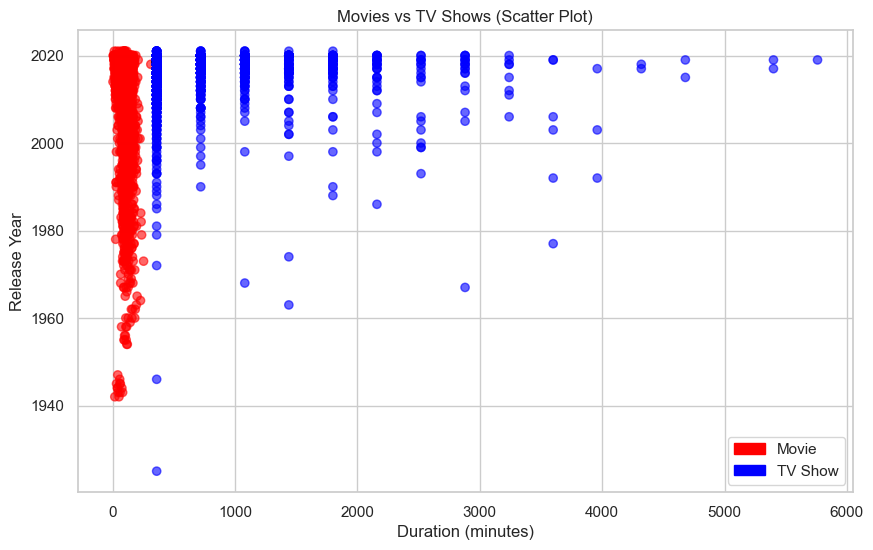

In [42]:
import matplotlib.pyplot as plt

# Make sure 'is_movie' exists (1 for Movie, 0 for TV Show)
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['duration_num'], df['release_year'],
                      c=df['is_movie'], cmap='bwr', alpha=0.6)

plt.title('Movies vs TV Shows (Scatter Plot)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Release Year')
plt.grid(True)

# Add legend manually
import matplotlib.patches as mpatches
movie_patch = mpatches.Patch(color='red', label='Movie')
tv_patch = mpatches.Patch(color='blue', label='TV Show')
plt.legend(handles=[movie_patch, tv_patch])

plt.show()


From the above `scatterplot` we see that:
- There are *two* clusters. **Blue** and **Red**.
- The **Red** cluster shows the **movies** with durations within *0-250 mins*.
- The **Blue** cluster represents all the **shows** with higher durations.
- It also shows that the show with the shortest duration is significantly longer than the longest movie.

1. Why did you pick the specific chart?
- A scatterplot was chosen to visualize the relationship between content duration and release year while distinguishing between movies and TV shows. Coloring the data points by content type enables clear identification of structural differences and clustering patterns, making it easier to interpret temporal and duration-based trends.

2. What is/are the insight(s) found from the chart?
    - Two distinct clusters are visible: one for Movies (Red) and another for TV Shows (Blue).
    - Movies have a compact duration range (mostly under 250 minutes), while TV Shows tend to have much longer durations due to episodic formats.
    - The shortest TV Show is longer than the longest Movie, suggesting a fundamental difference in format length.
    - TV Shows and Movies have been released across a similar timeline, showing Netflix maintains a balance between both content types over the years.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, these insights support strategic content curation and user experience design. By understanding clear format differences, Netflix can refine recommendation algorithms based on user preferences for shorter (Movies) or longer (TV Shows) content. This distinction can also inform marketing approaches and content segmentation. No negative trends are observed, though the significant time investment required for shows may deter casual viewers—highlighting a potential need for more concise show formats or episode-based previews.


## Report Summary

**Netflix Content Analysis Key Points:**

1. **Content Type Distribution**
   - Netflix features more Movies than TV Shows in its overall catalog.

2. **Geographical Production**
   - The U.S. is the top content-producing country.
   - India leads for movie production after the U.S., while the U.K. is the runner-up for TV Shows.
   - A significant number of entries lack country information, indicating metadata gaps.

3. **Audience Ratings**
   - Content is skewed towards mature audiences (TV-MA, R).
   - There is also a healthy representation of content for teens (TV-14, PG-13) and younger viewers.

4. **Release Year Trends**
   - Content production peaked between 2017 and 2020.
   - 2018 saw the highest number of Movies, while 2020 saw a surge in TV Show releases—likely influenced by global lockdowns.

5. **Genre Popularity**
   - Leading genres include Documentaries, Stand-Up Comedy, Dramas, and International Movies.
   - Kids TV dominates the TV Show category, although mature-rated content remains prevalent.

6. **Top Actors & Genre Involvement**
   - Common genres among top actors include Thrillers, Action, Adventure, and Comedy.
   - Anupam Kher stands out for versatility across multiple genres.
   - International and Independent Movies are highly represented in their portfolios.
   - Yuki Kaji is an exception, with less involvement in the Thriller genre.

7. **Genre Distribution Over Time**
   - Genre popularity has been consistent over the years with a steady release of diverse content types.
   - Top 10 genres have maintained strong representation across release years.

8. **Temporal Patterns in Content Addition**
   - Most content is added during the winter months—especially November to January—likely to match holiday season demand.
   - Content added is generally recently released, showing a focus on fresh offerings.

9. **Correlation Insights**
   - TV Shows are significantly longer than Movies due to their episodic nature.
   - Newer content tends to have more mature audience ratings.
   - There's a slight trend toward shorter content in recent years.
   - Minimal correlation exists between release year and duration, suggesting flexible content length strategies.
   - PG and TV-PG rated content spans a wide range of durations, indicating diverse content formats for all age groups.

10. **Movie vs TV Show Scatterplot Insights**
    - A clear bifurcation exists between Movies and TV Shows based on duration.
    - Movies (red) cluster around 0–250 minutes.
    - TV Shows (blue) occupy the higher duration range.
    - The shortest TV Show is still longer than the longest Movie, highlighting fundamental differences in format.

## Conclusion

Netflix’s catalog is heavily influenced by recent, mature-rated content, primarily produced in the U.S., with India and the U.K. as notable contributors. Documentaries, Dramas, and International genres lead the genre landscape, while Kids TV holds a stronghold in show formats. Content release surged during 2017–2020, and winter months remain the top period for new additions. Top actors tend to favor high-action and international roles. Strategic patterns like emphasizing mature, shorter content and adding shows during high-demand months reflect Netflix’s data-driven approach to audience engagement and content planning.
